In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

from scipy.optimize import minimize, LinearConstraint, NonlinearConstraint
from resources.codes_nl import Plot_Package

# Sand Transport


The cost of transporting sand from one place to another in a container with dimensions x, y, and z is $2 per trip. Assuming that the price of the material for the top and bottom walls, and for the sides of the container are three times and two times, respectively, the price of the front and back walls, find the minimum price to transport 50 cubic meters of sand.

z: Container Height <br>
x, y: Other container Dimensions <br>
n: number of trips

**1. Minimize:**

Container cost:

$$3 (2 xy) + 2(2xz) + 2yz$$ 

Transport cost:

$$2 {50 \over xyz}$$

Minimize:

$$3xy + 2(2xz + 2yz) + xy + 2 {50 \over xyz}$$



x = [x, y, z]

In [2]:
# Define the objective function

def objective(x, k=1.5): #k:proportional constant. Here k=1.5
    return k*(3*(2*x[0]*x[1]) + 2*(2*x[0]*x[2]) + 2*x[1]*x[2]) + 100/(x[0]*x[1]*x[2])

# initial guess for dimensions
x0 = [30, 50, 10]

Text(0.5, 0, 'Z')

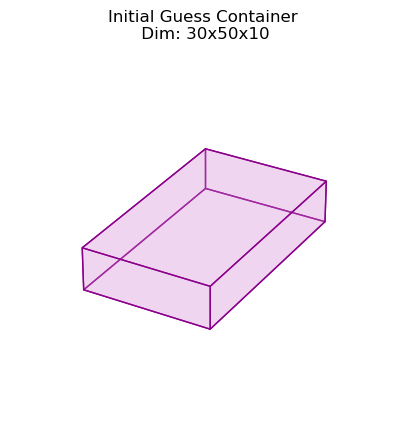

In [3]:
ax = Plot_Package(x0)
ax.set_title('Initial Guess Container\n Dim: {0}x{1}x{2}'.format(x0[0], x0[1], x0[2]));
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')

3) **Define the bounds**

In [4]:
# define the bounds for each dimension
bnd = ((0, np.inf), (0, np.inf), (0, np.inf))

4) **Optimize**

In [5]:
problem = {'fun': objective, #objective function
           'x0': x0, #Initial guess
           'bounds': bnd,
          }

In [6]:
# Choose an optimization method

method = 'SLSQP'

In [7]:
result = minimize(**problem, method=method)
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 66.1395155369606
       x: [ 8.573e-01  1.714e+00  2.572e+00]
     nit: 47
     jac: [ 1.579e-03 -2.995e-04  2.594e-04]
    nfev: 226
    njev: 47

Text(0.5, 0, 'Z')

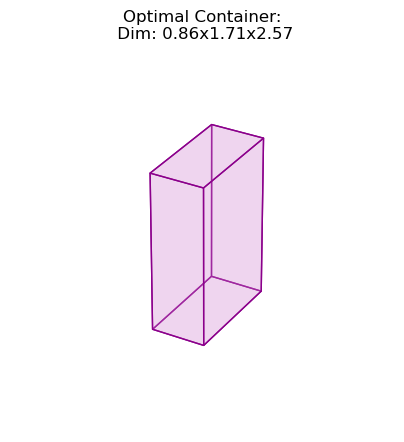

In [8]:
ax = Plot_Package(result.x)
ax.set_title('Optimal Container:\n Dim: {0}x{1}x{2}'.format(np.round(result.x, 2)[0], np.round(result.x, 2)[1], np.round(result.x, 2)[2]));
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')